In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
from matplotlib import pyplot as plt
""
plt.style.use('ggplot')

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.
test_images = test_images / 225.

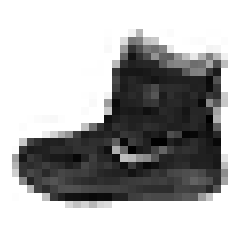

In [4]:
plt.imshow(train_images[0,:,:], cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.grid(False)

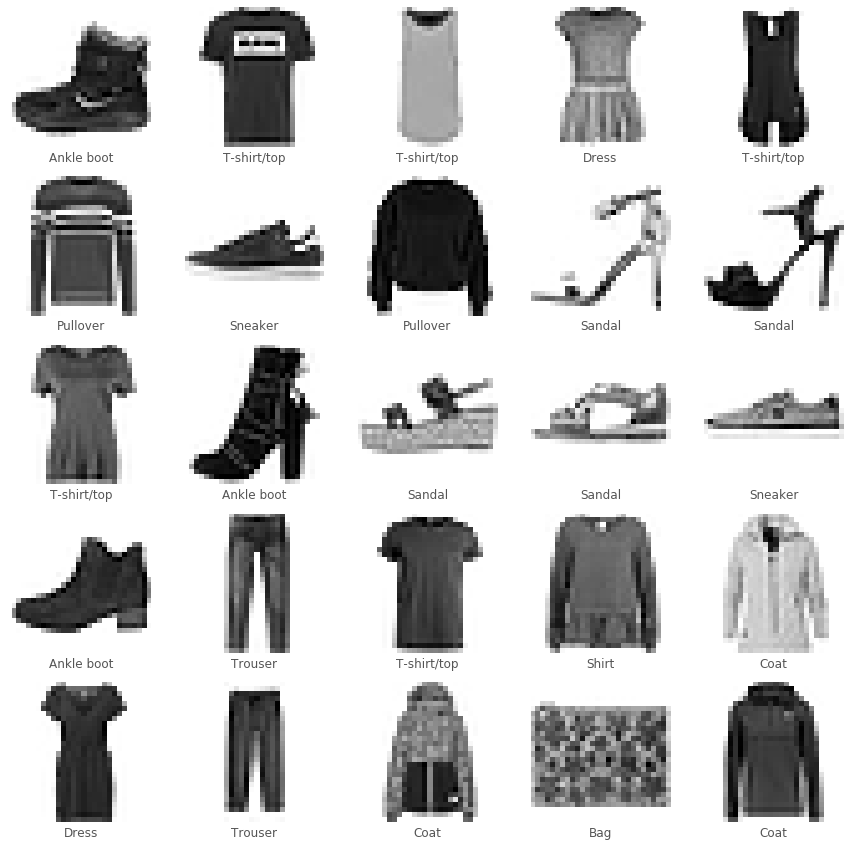

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, batch_size=512, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0353 - acc: 0.9893
Epoch 2/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0317 - acc: 0.9912
Epoch 3/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0302 - acc: 0.9916
Epoch 4/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0308 - acc: 0.9916
Epoch 5/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0319 - acc: 0.9909
Epoch 6/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0330 - acc: 0.9908
Epoch 7/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0314 - acc: 0.9912
Epoch 8/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0304 - acc: 0.9918
Epoch 9/20
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0311 - acc: 0.9913
Epoch 10/20
60000/60000 [==============================] - 1s 12us/sample - loss: 

In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.6303 - acc: 0.8838


[0.6302686050593853, 0.8838]

In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([2.0160514e-23, 2.7171200e-30, 2.2169105e-17, 1.9890723e-21,
       7.9558014e-16, 1.7291810e-10, 5.5629596e-20, 2.0036779e-07,
       4.0065962e-17, 9.9999976e-01], dtype=float32)

In [20]:
np.argmax(predictions[1])

2

In [21]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

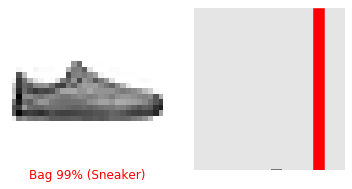

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)